In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
girl, boy = np.loadtxt(fname='girl.txt'),np.loadtxt('boy.txt')
girlY, boyY =np.ones(girl.shape[0]), np.zeros(165)
X, Y = np.vstack((boy, girl)), np.hstack((boyY, girlY))
sheet = xlrd.open_workbook("fm_2018.xlsx").sheets()[0]
X1,X2,X3= sheet.col_values(0),sheet.col_values(1),sheet.col_values(2)
X_test = np.array([X1,X2,X3]).T
X_test, y_test = X_test[1:,:], np.array(sheet.col_values(3))[1:]
y_test = np.array(y_test=="女",dtype="float64")
X_test, Y = X_test.astype("float64"), Y.astype('float64')

In [14]:
from sklearn.naive_bayes import GaussianNB
def bayers_3d():    
    models = (GaussianNB(priors = [0.1, 0.9]),
               GaussianNB(priors=[0.5,0.5]),
                GaussianNB(priors=[0.75,0.25]),
                GaussianNB(priors=[0.25,0.75])) 
    models = [clf.fit(X, Y) for clf in models]
    # scores
    scores = [model.score(X_test, y_test) for model in models]
    print("R_squre")
    print(scores)
    s = [sum(model.predict(X_test)==y_test)/len(y_test) for model in models]
    print("accuracy")
    print(s)
    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.5,0.5]',
              'priors=[0.25,0.75]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet") 
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import roc
    from sklearn.metrics import roc_curve
    fprs = []
    tprs = []
    decision_scores = models[0].predict_log_proba(X_test)
    decision_scores=decision_scores[:,0]-decision_scores[:,1]
#     fprs, tprs,_  = roc(decision_scores, y_test)
    tprs, fprs,_  = roc_curve(y_test, decision_scores)
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(titles[0])

R_squre
[0.9302325581395349, 0.9069767441860465, 0.9069767441860465, 0.9534883720930233]
accuracy
[0.9302325581395349, 0.9069767441860465, 0.9069767441860465, 0.9534883720930233]


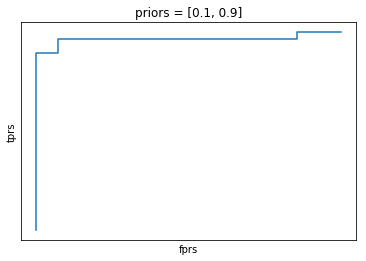

In [15]:
bayers_3d()

In [24]:
from playML.Bayers import BayersGN
def bayers_3d():    
    models = (BayersGN(priors = [0.1, 0.9]),
               BayersGN(priors=[0.5,0.5]),
                BayersGN(priors=[0.75,0.25]),
                BayersGN(priors=[0.25,0.75])) 
    models = [clf.fit(X, Y) for clf in models]
    # scores
    scores = [model.score(X_test, y_test) for model in models]
    print("R_squre")
    print(scores)
    s = [sum(model.predict(X_test)==y_test)/len(y_test) for model in models]
    print("accuracy")
    print(s)
    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.5,0.5]',
              'priors=[0.25,0.75]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet") 
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import roc
    from sklearn.metrics import roc_curve
    fprs = []
    tprs = []
    decision_scores = models[0].decision_function(X_test)
#     decision_scores=decision_scores[:,0]-decision_scores[:,1]
#     fprs, tprs,_  = roc(decision_scores, y_test)
    fprs, tprs,_  = roc_curve(y_test, decision_scores)
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(titles[0])

R_squre
[0.7881773399014778, 0.7881773399014778, 0.5763546798029556, 0.7881773399014778]
accuracy
[0.9534883720930233, 0.9534883720930233, 0.9069767441860465, 0.9534883720930233]


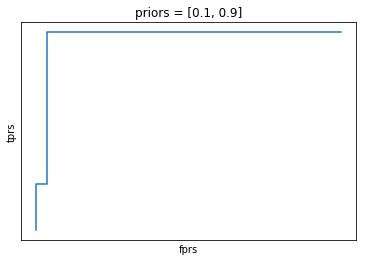

In [25]:
bayers_3d()